<a href="https://colab.research.google.com/github/googlecloudlab/tensorflow/blob/main/Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Basic Neural Network

## Setting up a TensorFlow Pipeline

We'll use the Keras module to help build our basic neural
networks. Keras contains multiple classes and objects that can be combined to design a variety of neural network types. These classes and objects are order-dependent, which means that depending on what Keras objects are used (and in what order), the behavior of the neural network model will change accordingly. For our basic neural network, we'll use two Keras classes:

* The **Sequential** class is a linear stack of neural network layers, where data flows from one layer to the next. This model is what we simulated in the TensorFlow Playground.
* The generalized **Dense** class allows us to add layers within the neural network.

With the Sequential model, we'll add multiple Dense layers that can act as our input, hidden, and output layers. For each Dense layer, we'll define the number of neurons, as well as the activation function. Once we have completed our Sequential model design, we can apply the same Scikit-learn model -> fit -> predict/transform workflow as we used for other machine learning algorithms.

In [46]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

Once we have our required libraries imported into our notebook, we can create the dummy data using Scikit-learn's `make_blobs` method. The `make_blobs` is used to create sample values and contains many parameters that change the shape and values of the sample dataset. For our purposes, we'll use the make_blobs method to create 1,000 samples with two features (also known as our x- and y-axis values) that are linearly separable into two groups. Let's generate and visualize our dummy data using the  code in the next cell.

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

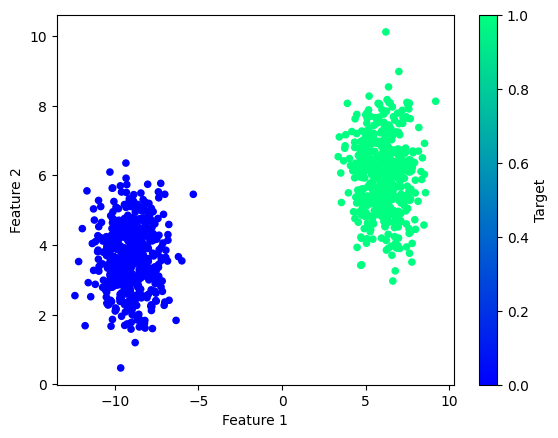

In [47]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

Once we have our dummy data generated, we'll split our data into training and test datasets using Scikit-learn's `train_test_split` method.

In [48]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

Now that we have our training data, we need to prepare the dataset for our neural network model. As with any machine learning algorithm, it is crucial to normalize or standardize our numerical variables to ensure that our neural network does not focus on outliers and can apply proper weights to each input. In most cases, the more that input variables are normalized to the same scale, the more stable the neural network model is, and the better the neural network model will generalize.

In [49]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Finally, we have our data ready for our first neural network model! To create the neural network in our notebook, first we must create our Sequential model.

In [50]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

The `nn_model` object will store the entire architecture of our neural network model. Our next step is to add our first layer, which will contain our inputs and a hidden layer of neurons.

The Keras module does not have specific classes for input, hidden, and output layers. All layers are built using the Dense class, and the input and first hidden layer are always built in the same instance.

For our first layer, we need to define a few parameters:

* The `input_dim` parameter indicates how many inputs will be in the model (in this case two).
* The `units` parameter indicates how many neurons we want in the hidden layer (in this case one).
* The `activation` parameter indicates which activation function to use. We'll use the ReLU activation function to allow our hidden layer to identify and train on nonlinear relationships in the dataset.

In [51]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

Now that we have our input and hidden layers built, we need to add an output layer.

Once again, we'll use the `**Dense**` class to tell our Sequential model what to do with the data. This time, we only need to supply the number of output neurons. For a classification model, we only want a yes or no binary decision; therefore, we only need one output neuron. In our previous layer, we used a ReLU activation function to enable nonlinear relationships; however, for our classification output, we want to use a sigmoid activation function to produce a probability output.

In [52]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

Now that we have added our layers to the Sequential model, we can double-check our model structure using the `**summary**` method.

The number of parameters in each layer does not equal the number of neurons we defined in the notebook. Remember, every layer has one additional input known as our bias term (or weighted constant).

In [53]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


Now that we have our layers defined, we have to inform the model how it should train using the input data. The process of informing the model how it should learn and train is called compiling the model.

Depending on the function of the neural network, we'll have to compile the neural network using a specific optimization function and loss metric. The **optimization function** shapes and molds a neural network model while it is being trained to ensure that it performs to the best of its ability. The **loss metric** is used by machine learning algorithms to score the performance of the model through each iteration and epoch by evaluating the inaccuracy of a single input. To enhance the performance of our classification neural network, we'll use the `adam` optimizer, which uses a gradient descent approach to ensure that the algorithm will not get stuck on weaker classifying variables and features. As for the loss function, we'll use `binary_crossentropy`, which is specifically designed to evaluate a binary classification model.

There are many types of [optimization functions](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) and [loss metrics](https://www.tensorflow.org/api_docs/python/tf/keras/losses). you may use in neural networks. We'll discuss and use a few in this module, but feel free to check out the [Keras documentation](https://www.tensorflow.org/guide/keras) for the full list of options.

In addition to the optimization function and loss metric, we'll also add a more reader-friendly **evaluation metric**, which measures the quality of the machine learning model. There are two main types of evaluation metrics—the model predictive accuracy and model mean squared error (MSE). We use `accuracy` for classification models and `mse` for regression models. For model predictive accuracy, the higher the number the better, whereas for regression models, MSE should reduce to zero.

In [54]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

## Train and Test a Basic Neural Network

At last, our Sequential neural network is modeled and compiled, so now we can move onto training/fitting our model to the dummy data. To train/fit our Keras model, we'll use the `fit` method and provide the x training values and y training values, as well as the number of epochs. Each epoch is a complete pass through the training data. As we tested earlier in the TensorFlow Playground, the neural network binary classification model reached optimal performance at around 100 epochs. Since we designed our Sequential model to match the TensorFlow Playground simulation, we should expect similar performance.

In [55]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.7509 - accuracy: 0.4053
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7381 - accuracy: 0.0000e+00
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7269 - accuracy: 0.0000e+00
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7169 - accuracy: 0.0000e+00
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7079 - accuracy: 0.0000e+00
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.0040
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.4347
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.4933
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.8787
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 

Looking at the model training output, we know that the loss metric was 0.07 and the predictive accuracy is 1.0. This means that although our model performance had more loss than the simulation data, the model correctly classifies all of our training data, which is sufficient for our needs. Note that the model isn't seeded, meaning that the results in your notebook will likely not be identical to one in this example. However, you should observe similar general trends.

Under the hood, the neural network will select random weights to start training the model, so that each and every time we create a neural network, the model will be different. However, due to the `adam` optimizer, our model's end performance should be very similar, regardless of the loss function.

When training completes, the model object stores the loss and accuracy metrics across all epochs, which we can use to visualize the training progress. For example, if we wanted to visualize our model's loss over the full 100 epochs, we can run the following code:

<Axes: >

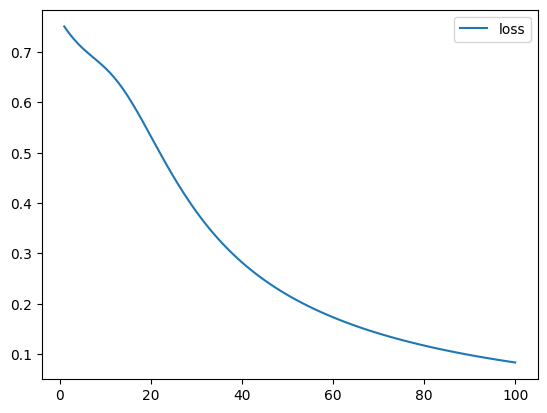

In [56]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

Similarly, we can plot the accuracy over time using the same DataFrame:

<Axes: >

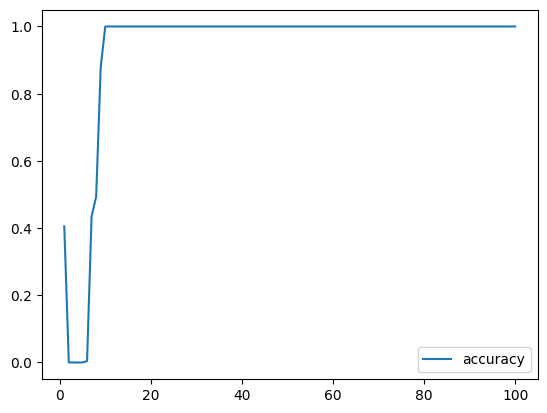

In [57]:
# Plot the accuracy
history_df.plot(y="accuracy")

Remember, our neural network consisted of a single hidden layer with one neuron—if we were to increase the number of neurons in the hidden layer, the neural network would have been able to fit the training data even faster!

Now that our model has been properly trained, we must evaluate model performance using the test data. Testing a neural network model in TensorFlow is very similar to testing a machine learning model in Scikit-learn. For our purposes, we'll use the `evaluate` method and print the testing loss and accuracy values. In our notebooks, we'll run the following code:

In [58]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0779 - accuracy: 1.0000 - 145ms/epoch - 18ms/step
Loss: 0.07787157595157623, Accuracy: 1.0


Looking at the performance metrics from the model, the neural network was able to correctly classify each of the points in the test data. In other words, the model was able to correctly classify data it was not trained on 100% of the time. Although perfect model performance is ideal, more complex datasets and models may not be able to achieve 100% accuracy. Therefore, it is important to establish model performance thresholds before designing any machine learning model. Depending on the type of data and the use case, we may have to recreate and retrain a model using different parameters, different training/test data, or even look to use a different model entirely.

Now that we have a trained neural network model and we have verified its performance using a test dataset, we can apply this model to novel datasets and predict the classification of a data point. In our Sequential model, we can use the `predict` method to generate predictions on new data. For example, if we wanted to predict the class of a new blob dataset, we can run the following code:

In [59]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 49ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

## Nuances of Neural Networks on Nonlinear Numbers

Now that we have designed a basic single-neuron, single-layer model, trained the model, and evaluated its performance using a test dataset, we are ready to start testing the limits of the basic neural network. As previously mentioned, simple linear regression and singular perceptron models work really well as a binary classifier when the data is linearly separable. But what about nonlinear data? How does our basic neural network model behave when data becomes more complicated?

To test this behavior, let's generate some new dummy data. This time we'll generate some nonlinear moon-shaped data using Scikit-learn's `make_moons` method and visualize it using Pandas and Matplotlib. Using the same notebook, we'll run the following code:

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

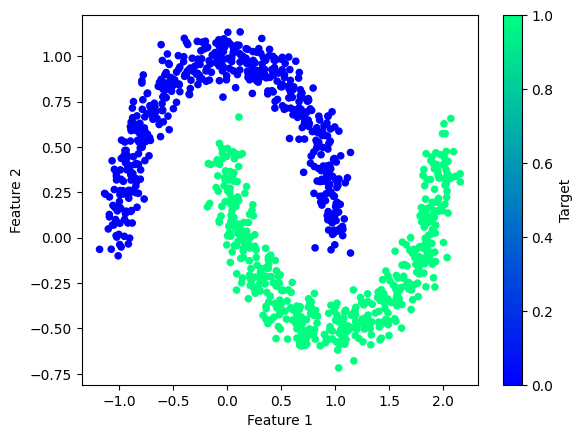

In [60]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

Since we are not changing the structure of our neural network, nor are we changing its function, we can use the same Sequential model object. The only difference from our previous workflow is this time we will retrain and evaluate on the nonlinear moon-shaped data.

As with our previous dummy data example, we need to split our nonlinear data into training and testing datasets and normalize our datasets. In the same notebook, we'll run the following code:

In [61]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

Just as we did with the linear data, we'll train our neural network model using the fit method on the nonlinear training data. Let's run the following code to our notebooks:



In [62]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 1.0829 - accuracy: 0.4533
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9805 - accuracy: 0.4760
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9073 - accuracy: 0.4960
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8589 - accuracy: 0.5067
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8230 - accuracy: 0.5213
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7952 - accuracy: 0.5400
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7731 - accuracy: 0.5480
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7549 - accuracy: 0.5587
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7395 - accuracy: 0.5680
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7261 - accuracy: 0.5760
Epoch 11/

Notice that this time our single-neuron, single-layer neural network was unable to accurately classify all of our training data.

In our example, TensorFlow stopped training the model after 84 epochs because the loss metric was no longer decreasing at a substantial rate, and the accuracy was not improving.

Let's plot out the loss and accuracy curves over our training iterations. Again, we'll run the following code to the notebook:

<Axes: >

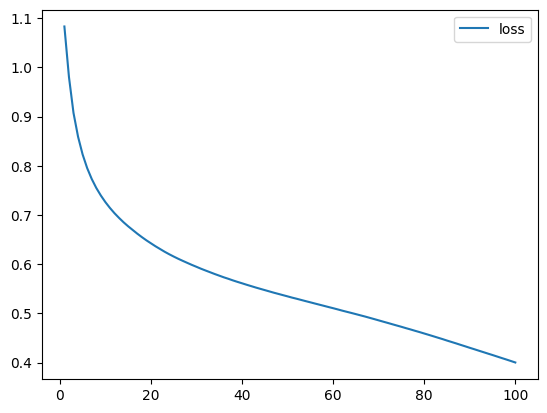

In [63]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")


<Axes: >

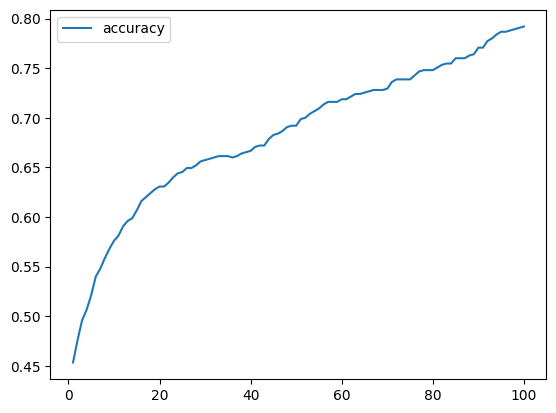

In [64]:
# Plot the accuracy
history_df.plot(y="accuracy")

According to the accuracy metric, the basic single-neuron, single-layer neural network model was only able to correctly classify 89% of all data points in the nonlinear training data. Depending on a person's use case, 89% accuracy could be sufficient for a first-pass model. For example, if we were trying to use a neural network model to separate left-handed people from right-handed people, a model that is correct 89% of the time is very accurate, and guessing incorrectly does not have a huge negative impact.

However, in many industrial and medical use cases, a model's classification accuracy must exceed 95% or even 99%. In these cases, we wouldn't be satisfied with the basic single-neuron, single-layer neural network model, and we would have to design a more robust neural network. In summary, the more complicated and nonlinear the dataset, the more components we'd need to add to a neural network to achieve our desired performance.

## Create the Connective Tissue, the Multiple Neuron Neural Network

We learned that adding neurons to a neural network can help to generate a well-performing model faster than using a single-neuron, single-layer neural network. In fact, there are multiple advantages to adding neurons to our hidden layer in a neural network. Some of the advantages follow:

* There is a distributed effort to find optimal weights—faster.
* Each neuron can focus on different features to identify nonlinear effects—smarter.
* It is less likely to fixate on complex variables—more robust.

So, if adding more neurons to our neural network model increases the performance, why wouldn't we always use the maximum number of neurons? There are two main reasons to limit the number of neurons in a neural network model: overfitting and computation resources. Similar to other machine learning algorithms, neural networks are susceptible to overfitting where the model fits the training data too well. As a result of overfitting, the neural network will not generalize well and won't be able to classify new data correctly. Additionally, a neural network model with a large number of neurons requires equally large training dataset—training a large neural network requires more data, more epochs, and more time. Therefore, it is important that a neural network model has an appropriate number of neurons to match the size of the data, the complexity of the problem, and the amount of input neurons.

A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs.

Since our blob and moon-shaped dummy datasets are created using two variables, our neural network model uses two input values.

Applying the neuron rule of thumb, we should use a neural network model with six neurons in the hidden layer to properly model our linear and nonlinear datasets. Thankfully, designing a neural network with more layers is the exact same workflow as before, except we tweak a few parameters.

Since we want to change the structure of our neural network model, we must first create a new Sequential model running the following code:

In [65]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

Using our new Sequential model, we'll add our input, hidden, and output layers using the `Dense` class. However, this time we'll create a hidden layer with six neurons instead of one by changing the `units` parameter while keeping all other parameters the same. Run the following code:

In [66]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

Now that our new Sequential model is defined, we need to compile and train the model using our nonlinear moon-shaped dummy data. For us to make direct comparisons with our single-neuron model, we'll use the same training parameters, including loss metric, optimizer function, and number of epochs.

In [67]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6434 - accuracy: 0.6480
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy: 0.6960
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.7427
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5613 - accuracy: 0.7667
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5397 - accuracy: 0.7907
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.8053
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.8173
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.8213
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4675 - accuracy: 0.8347
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4518 - accuracy: 0.8413
Epoch 11/

Looking at the training metrics of our new model, as we increase the number of neurons within the hidden layer, the classification accuracy improves. You may have noticed that adding multiple neurons to our neural network did not yield a perfect classification model. As input data becomes more complex, neural networks will require more and more optimization tweaks to achieve their desired accuracy.

# Give Your Model a Synaptic Boost

As with all machine learning algorithms, neural networks are not perfect and will often underperform using a basic implementation. When a neural network model does not meet performance expectations, it is usually due to one of two causes: inadequate or inappropriate model design for a given dataset, or insufficient or ineffective training data. Although collecting more training/test data is almost always beneficial, it may be impossible due to budget or logistical limitations. Therefore, the most straightforward means of improving neural network performance is tweaking the model design and parameters.

When it comes to tweaking a neural network model, a little can go a long way. If we tweak too many design aspects and parameters at once, we can cause a model to become less effective without a means of understanding why. To avoid trapping ourselves in endless optimization iterations, we can use characteristics of our input data to determine what parameters should be changed.

There are a few means of optimizing a neural network:

* Check out your input dataset.
* Add more neurons to a hidden layer.
* Add additional hidden layers.
* Use a different activation function for the hidden layers.
* Add additional epochs to the training regimen.


## Check Out Your Input Dataset

Before you start down the endless journey of model optimization, it is always a good idea to check the input data and ensure that there are no variables or set of outliers that are causing the model to be confused. Although neural networks are tolerant of noisy characteristics in a dataset, neural networks can learn bad habits (like the brain does). Even if we standardize and scale our numerical variables, too many outliers in a single variable can lead to performance issues.

## Add More Neurons and Hidden Layers

We can optimize a neural network by adding neurons to the hidden layer. Adding neurons to a hidden layer has diminishing returns—more neurons means more data as well as a risk to overfitting the model.

Instead of adding more neurons, we could change the structure of the model by adding additional hidden layers, which allows neurons to train on activated input values, instead of looking at new training data. Therefore, a neural network with multiple layers can identify nonlinear characteristics of the input data without requiring more input data.

This concept of a multiple-layered neural network is known as a deep learning neural network. We'll be exploring deep learning neural networks in greater detail later in the module.

## Use a Different Activation Function

Another strategy to increase performance of a neural network is to change the activation function used across hidden layers. Depending on the shape and dimensionality of the input data, one activation function may focus on specific characteristics of the input values, while another activation function may focus on others.

It is important to use an activation function that matches the complexity of the input data. If we wanted to rank the four most-used activation functions by data complexity and ideal use case, the order would be as follows:

1. The **sigmoid function** values are normalized to a probability between 0 and 1, which is ideal for binary classification.
2. The **tanh function** can be used for classification or regression, and it expands the range between -1 and 1.
3. The **ReLU function** is ideal for looking at positive nonlinear input data for classification or regression.
4. The **Leaky ReLU function** is a good alternative for nonlinear input data with many negative inputs.

By default, the Keras Dense layer will implement the linear activation function, which means that the net sum value is not transformed.  The linear activation function limits the neural network model to only perform a linear regression. Therefore, the linear activation function is only appropriate for an output layer.

To experiment and optimize using an activation function, try selecting from activation functions that are slightly more complex than your current activation function. For example, if you were trying to build a regression neural network model using a wide input dataset, you might start with a tanh activation function. To optimize the regression model, try training with the ReLU activation function, or even the Leaky ReLU activation function. In most cases, it is better to try optimizing using a higher complexity activation function rather than a lower complexity activation function. Using a higher complexity activation function will assess the input data differently without any risk of censoring or ignoring lower complexity features.

## Add Additional Epochs to Training Regimen

If your model still requires optimizations and tweaking to meet desired performance, you can increase the number of epochs, or training iterations. As the number of epochs increases, so does the amount of information provided to each neuron. By providing each neuron more information from the input data, the neurons are more likely to apply more effective weight coefficients. Adding more epochs to the training parameters is not a perfect solution—if the model produces weight coefficients that are too effective, there is an increased risk of model overfitting. Therefore, models should be tested and evaluated each time the number of epochs are increased to reduce the risk of overfitting.

As with all machine learning models, creating an ideal classification or regression model is part mathematics and part art. As we design more and more models, optimizing and fine-tuning becomes less trial and error and more pattern recognition.

## Adding Checkpoints

Neural networks, especially complex neural networks, are resource-hungry algorithms. When it comes to training neural networks on medium to large datasets, the amount of computation time to adequately train a model can take hours (or even days!) With simple modelling problems, like the ones covered in this module, training a model in the same notebook as an analysis is no problem. However, with more formal applications of neural network and deep learning models, data scientists cannot afford the time or resources to build and train a model each time they analyze data. In these cases, a trained model must be stored and accessed outside of the training environment.

With TensorFlow, we have the ability to save and load neural network models at any stage, including partially trained models. When building a TensorFlow model, if we use Keras' `ModelCheckpoint` method, we can save the model weights after it tests a set number of data points. Then, at any point, we can reload the checkpoint weights and resume model training. Saving checkpoints while training has a number of benefits:

We can short-circuit our training loop at any time (stop the function by pressing CTRL+C, or by pressing the stop button at the top of the notebook). This can be helpful if the model is showing signs of overfitting.
The model is protected from computer problems (power failure, computer crash, etc.). Worst-case scenario: We would lose five epochs' worth of optimization.
We can restore previous model weight coefficients to try and revert overfitting.

To use checkpoints, we need to define the checkpoint file name and directory path. For our purposes, we'll label our checkpoints by epoch number and contain them within their own folder. This ensures that our checkpoint files are neat, organized, and easily identifiable. Run the following code in your notebook:

In [68]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

Once we have defined the file structure and filepath, we need to create a **callback** object for our deep learning model. A callback object is used in the Keras module to define a set of functions that will be applied at specific stages of the training process. There are a number of different callback functions available that can create log files, force training to stop, send training status messages, or in our case save model checkpoints. To create an effective checkpoint callback using the `ModelCheckpoint` method, we need to provide the following parameters:

* `filepath=checkpoint_path` —the checkpoint directory and file structure we defined previously
* `verbose=1` —we'll be notified when a checkpoint is being saved to the directory
* `save_weights_only=True` —saving the full model each time can fill up a hard drive very quickly; this ensures that the checkpoint files take up minimal space
* `save_freq='epoch'` —checkpoints will be saved every epoch

Bringing it all together, we can compile, train, and evaluate our deep learning model by running the following code:

In [70]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn_model.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
 1/24 [>.............................] - ETA: 14s - loss: 0.2944 - accuracy: 1.0000
Epoch 1: saving model to checkpoints/weights.01.hdf5
24/24 [==============================] - 1s 2ms/step - loss: 0.3239 - accuracy: 0.9653
Epoch 2/100
 1/24 [>.............................] - ETA: 0s - loss: 0.3558 - accuracy: 0.9062
Epoch 2: saving model to checkpoints/weights.02.hdf5
24/24 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.9787
Epoch 3/100
 1/24 [>.............................] - ETA: 0s - loss: 0.3135 - accuracy: 0.9375
Epoch 3: saving model to checkpoints/weights.03.hdf5
24/24 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.9867
Epoch 4/100
 1/24 [>.............................] - ETA: 0s - loss: 0.2889 - accuracy: 1.0000
Epoch 4: saving model to checkpoints/weights.04.hdf5
24/24 [==============================] - 0s 2ms/step - loss: 0.2746 - accuracy: 0.9907
Epoch 5/100
 1/24 [>.............................] - ETA: 0

After running the previous code, we have created our trained model within the Python session, as well as a folder of checkpoints we can use to restore previous model weights. Now if we ever need to restore weights, we can use the Keras Sequential model's `load_weights` method to restore the model weights. To test this functionality, let's define another deep learning model, but restore the weights using the checkpoints rather than training the model. Once again we must run the following in our notebooks:

In [75]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer = 1


nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer, input_dim=number_input_features, activation="relu")
)

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0214 - accuracy: 1.0000 - 323ms/epoch - 40ms/step
Loss: 0.02143106237053871, Accuracy: 1.0


Using the checkpoints, we were able to regenerate the model instantaneously and confirm the model was able to produce the exact same results.

## Save after Training

Saving the weights is great, but what about saving—and sharing—the entire model?

Checkpoints are a great way to save model weights during training, but they fall short when it comes to sharing a trained model. In data science, trained models are published in scientific papers, deployed in software, open-sourced on GitHub, not to mention passed along to colleagues. In these cases, it is not practical to pass along only model weights, which can cause frustration and confusion. Instead, we can use the Keras Sequential model's `save` method to export the entire model (weights, structure, and configuration settings) to an Hierarchical Data Format [HDF5](https://en.wikipedia.org/wiki/Hierarchical_Data_Format) file. Once saved, anyone can import the exact same trained model to their environment by using the Keras `load_model` method and use it for analysis.

Even though we can save full neural network and deep learning models using Keras checkpoints, each full model file is almost ten times the size of a weight-only file. For those with limited hard drive space, saving full models using checkpoints is not feasible.



In [77]:
# Export our model to HDF5 file
nn_new.save("trained_model.h5")

After running the code, we should see a file named "trained_attrition.h5," which contains the complete model and configuration. Now that we have the model saved, we can create the model at any point. Let's try importing the model into the notebook without providing any structure or context. To import the model run the following code:

In [78]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('trained_attrition.h5')

Lastly, we can test the performance of the completed model on our test dataset by running the following code:

In [79]:
# Evaluate the completed model using the test data
model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0214 - accuracy: 1.0000 - 181ms/epoch - 23ms/step
Loss: 0.02143106237053871, Accuracy: 1.0


Looking at the final results, our imported model was able to reproduce the exact same performance metrics as the original model. Using this same procedure, we can import any type of Keras model for evaluation on a dataset with the same features.